In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures


### Lasso Regression (L1)

Штраф: сумма модулей весов
$$
min(\sum(y - \hat{y})^2 + \lambda \sum|w_i|)
$$

### Ridge Regression (L2)

Штраф: сумма квадратов весов
$$
min(\sum(y - \hat{y})^2 + \lambda \sum w_i^2)
$$


In [8]:
np.random.seed(42)
n = 120
X = np.linspace(-4, 6, n).reshape(-1, 1)
noise = np.random.normal(0, 6, size=n)
y = 0.5 * X[:,0]**3 - 3*X[:,0]**2 + 2*X[:, 0] + noise

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
def train_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(f"R^2 = {r2_score(y_test, y_pred): .4f}")
    print(f"RMSE = {mean_squared_error(y_test, y_pred)**0.5:.4f}\n")
    return model

In [11]:
from sklearn.pipeline import Pipeline

degree = 10

ridge = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

lasso = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.05, max_iter=100000))
])

elastic = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(alpha=0.001, l1_ratio=0.05, max_iter=100000))
])

ridge = train_model(ridge, "ridge")
lasso = train_model(lasso, "lasso")
elastic = train_model(elastic, "elastic (L1 + L2)")

=== ridge ===
R^2 =  0.9472
RMSE = 5.6133

=== lasso ===
R^2 =  0.9528
RMSE = 5.3109

=== elastic (L1 + L2) ===
R^2 =  0.9532
RMSE = 5.2851



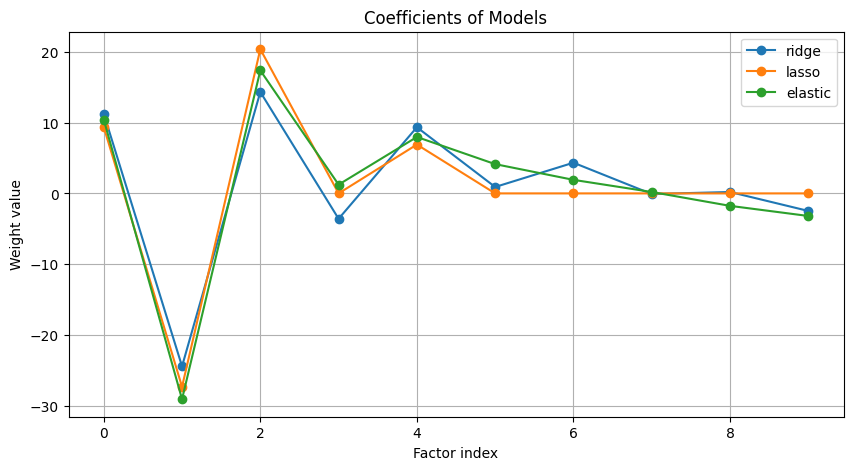

In [12]:
models = {
    "ridge": ridge.named_steps["ridge"].coef_,
    "lasso": lasso.named_steps["lasso"].coef_,
    "elastic": elastic.named_steps["elastic"].coef_
}

plt.figure(figsize=(10, 5))
for name, coef in models.items():
    plt.plot(coef, label=name, marker='o')

plt.title("Coefficients of Models")
plt.xlabel("Factor index")
plt.ylabel("Weight value")
plt.grid(True)
plt.legend()
plt.show()